# Real State Data Analysis

In this file we will be doing an Exploratory Data Analysis on the dataset "USA House Prices" uploaded to kaggle by Fırat Özcan.
The dataset can be found on the link: https://www.kaggle.com/datasets/fratzcan/usa-house-prices

Questions we would like to answer:
- What is the distribution of the house prices?
- How many houses have a price that is a lot higher or lower than the rest (outliers)?
- What are the top 5 cities with the highest house prices? And the top five cities with the most houses?
- How do property characteristics like bedrooms, bathrooms, and sqft_living correlate with price?
- How does waterfront, view, and condition impacts the price?

Here are the steps we will be going through in this analysis:
1. [Importing Libraries](#imp)
2. [Loading Dataset](#load)
3. [Data Understanding](#data-und)
4. [Data Cleaning](#data-clean)
5. [Exploratory Data Analysis](#eda)
6. [Feture Engineering](#feat-eng)
7. [Summary and Insights](#summary)

## Importing Libraries <a name="imp"></a>

In [1]:
# Importing the essential Python libraries we'll need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading Dataset <a name="load"></a>

In [2]:
# Load the dataset into a Pandas DataFrame.
file_path = r"C:\Users\Vitoria\OneDrive\Estudos e Profissão\Data Analysis (OneDrive)\Learning_Projects\usa_house_prices.csv"
df = pd.read_csv(file_path)

## Data Understanding <a name="data-und"></a>
Getting a basic overview of the dataset.

Checking data types, column names and meanings, data volume, and getting a sample fo the data.

In [3]:
# Get a summary of the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [4]:
# View the first 5 rows
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


## Data Cleaning <a name="data-clean"></a>
Checking for missing values, duplicates, and incorrect data.

In [5]:
# Check for missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
# Check for values equal to 0
(df == 0).sum()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4109
view             3722
condition           0
sqft_above          0
sqft_basement    2476
yr_built            0
yr_renovated     2462
street              0
city                0
statezip            0
country             0
dtype: int64

In [36]:
# Further look into the rows with price, bedrooms, and bathrooms equal to zero.
df[df['price'] == 0].head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,city,price_bins


In [8]:
df[df['bedrooms'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1905,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
2749,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


In [9]:
df[df['bathrooms'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1905,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
2749,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


In [10]:
# Droping rows in the columns price, bedrooms, and bathrooms that are equal to 0
df = df.query('price != 0 and bedrooms != 0 and bathrooms != 0')

In [11]:
# Checking for duplicates
df.duplicated().sum()

0

### Subsetting the Data

In [12]:
# Creating a new column 'state'
df['state'] = df['statezip'].str.split(' ').str[0]
# Checking how many states are in the dataset
df['state'].value_counts()

state
WA    4089
Name: count, dtype: int64

In [13]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'state'],
      dtype='object')

Here we observed that all of the entries are in the state of WA in the USA. Therefore we can drop the columns 'statezip', 'country', and 'state'.

The column for date is also not very relevant to us since they are all very close. So we can drop that as well.

And lastly, we will not be analysing the street, sqft_above, sqft_basement, and yr_renovated, so we can cut those from our subset.

After that we're going to have our new dataset.

In [14]:
# Subsetting the data
df = df[[#'date', 
            'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'floors', 'waterfront', 'view', 'condition', 
            #'sqft_above', 'sqft_basement', 'yr_renovated', 
            'yr_built', 'city'
            #'street','statezip', 'country', 'state'
            ]]
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 4089 entries, 0 to 4139
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4089 non-null   float64
 1   bedrooms     4089 non-null   float64
 2   bathrooms    4089 non-null   float64
 3   sqft_living  4089 non-null   int64  
 4   sqft_lot     4089 non-null   int64  
 5   floors       4089 non-null   float64
 6   waterfront   4089 non-null   int64  
 7   view         4089 non-null   int64  
 8   condition    4089 non-null   int64  
 9   yr_built     4089 non-null   int64  
 10  city         4089 non-null   object 
dtypes: float64(4), int64(6), object(1)
memory usage: 383.3+ KB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,city
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,2008,Seattle
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,2007,Carnation
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,2010,Issaquah
3,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,2007,Seattle
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1979,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1954,Seattle
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1983,Bellevue
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,2009,Renton
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1974,Seattle


In [15]:
# Exporting the dataset to csv
file_path = r"C:\Users\Vitoria\OneDrive\Estudos e Profissão\Data Analysis (OneDrive)\Learning_Projects\usa_houses_clean.csv"
if not os.path.exists(file_path):
    df.to_csv(file_path)
    print(f'File exported to {file_path}.')
else:
    print(f'File {file_path} already exists.')

File C:\Users\Vitoria\OneDrive\Estudos e Profissão\Data Analysis (OneDrive)\Learning_Projects\usa_houses_clean.csv already exists.


## Exploratory Data Analysis <a name="eda"></a>
Perform various analyses to understand the data better. 

### Univariate Analysis
Explore each variable individually.

Checking for: summary statistics, visualizations of important variables, and outliers.

In [16]:
# View summary statistics
pd.options.display.float_format = '{:.2f}'.format
df.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,city
count,4089.00,4089.00,4089.00,4089.00,4089.00,4089.00,4089.00,4089.00,4089.00,4089.00,4089
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1402
mean,559376.29,3.40,2.16,2135.05,14675.77,1.51,0.01,0.24,3.45,1970.82,NaN
std,583975.35,0.90,0.78,948.52,35973.12,0.53,0.08,0.78,0.68,29.84,NaN
min,7800.00,1.00,0.75,370.00,638.00,1.00,0.00,0.00,1.00,1900.00,NaN
25%,325000.00,3.00,1.75,1460.00,5000.00,1.00,0.00,0.00,3.00,1951.00,NaN
50%,464500.00,3.00,2.25,1980.00,7665.00,1.50,0.00,0.00,3.00,1976.00,NaN
75%,660000.00,4.00,2.50,2610.00,10945.00,2.00,0.00,0.00,4.00,1997.00,NaN


In [17]:
# View summary statistics for categorical variables (proportions)
df['city'].value_counts(normalize=True)

city
Seattle              0.34
Renton               0.06
Bellevue             0.06
Redmond              0.05
Kirkland             0.04
Kent                 0.04
Auburn               0.04
Issaquah             0.04
Sammamish            0.04
Federal Way          0.03
Shoreline            0.03
Woodinville          0.02
Maple Valley         0.02
Mercer Island        0.02
Snoqualmie           0.02
Burien               0.02
Kenmore              0.01
Des Moines           0.01
North Bend           0.01
Duvall               0.01
Covington            0.01
Lake Forest Park     0.01
Newcastle            0.01
Bothell              0.01
Tukwila              0.01
SeaTac               0.01
Vashon               0.01
Enumclaw             0.01
Carnation            0.00
Normandy Park        0.00
Medina               0.00
Fall City            0.00
Clyde Hill           0.00
Black Diamond        0.00
Pacific              0.00
Yarrow Point         0.00
Ravensdale           0.00
Preston              0.00
Milton 

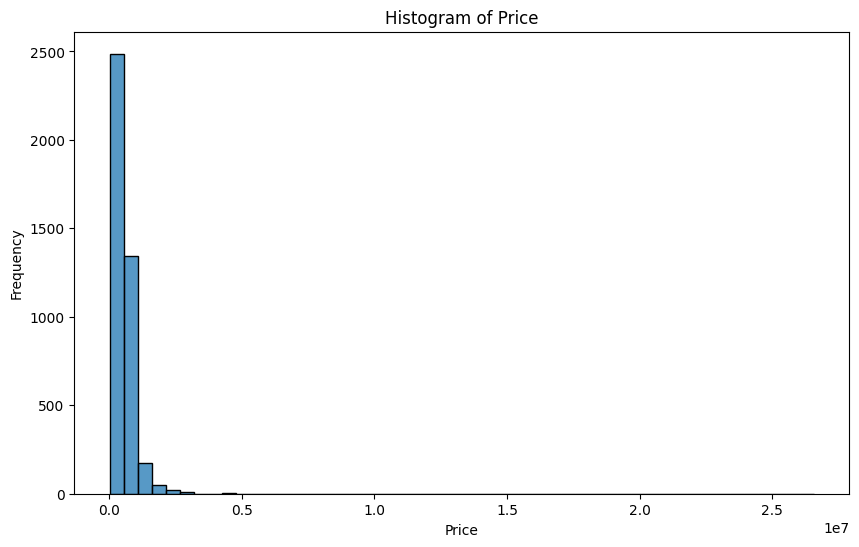

In [18]:
# Show the distribution of the price column in a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

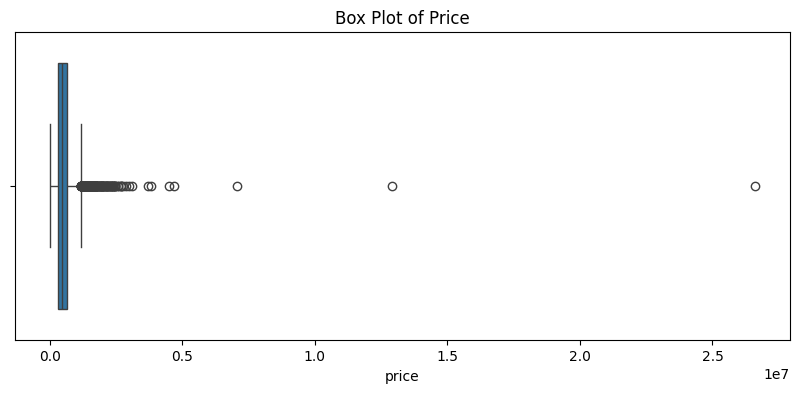

In [19]:
# Show the distribution of the price column in a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.show()

In [20]:
# Checking for outliers

# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound = {upper_bound}")

# Identify positive and negative outliers
positive_outliers = df[df['price'] > upper_bound]
negative_outliers = df[df['price'] < lower_bound]

# Count the number of positive and negative outliers
num_positive_outliers = positive_outliers.shape[0]
num_negative_outliers = negative_outliers.shape[0]

print(f"Number of positive outliers: {num_positive_outliers}")
print(f"Number of negative outliers: {num_negative_outliers}")


Q1 = 325000.0
Q3 = 660000.0
Upper bound = 1162500.0
Number of positive outliers: 215
Number of negative outliers: 0


In [21]:
df_no_price_outliers = df.query('price < 1162500')
print(df_no_price_outliers)

         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    376000.00      3.00       2.00         1340      1384    3.00   
1    800000.00      4.00       3.25         3540    159430    2.00   
3    324000.00      3.00       2.25          998       904    2.00   
4    549900.00      5.00       2.75         3060      7015    1.00   
5    320000.00      3.00       2.50         2130      6969    2.00   
...        ...       ...        ...          ...       ...     ...   
4135 308166.67      3.00       1.75         1510      6360    1.00   
4136 534333.33      3.00       2.50         1460      7573    2.00   
4137 416904.17      3.00       2.50         3010      7014    2.00   
4138 203400.00      4.00       2.00         2090      6630    1.00   
4139 220600.00      3.00       2.50         1490      8102    2.00   

      waterfront  view  condition  yr_built          city  
0              0     0          3      2008       Seattle  
1              0     0          3      

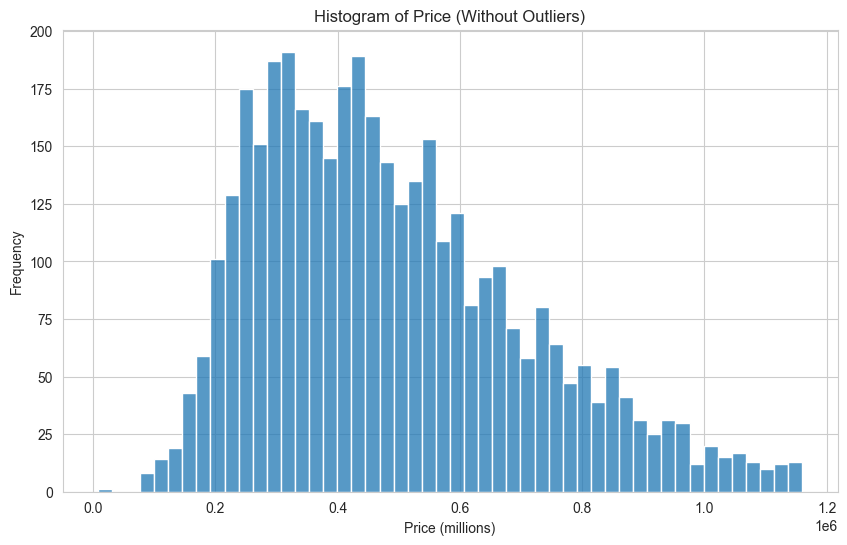

In [22]:
# Create a histogram for the 'price' column after removing the outliers
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_price_outliers, x='price', bins=50)

# Add titles and labels
plt.title('Histogram of Price (Without Outliers)')
plt.xlabel('Price (millions)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

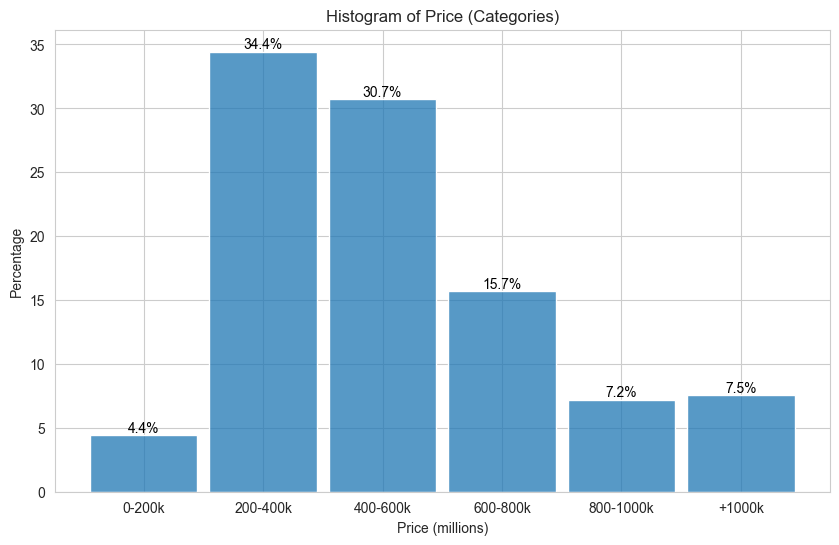

In [23]:
# Checking the distribution of the prices after being placed into bins

# Create a 'price categories' column with bins to better analyze the prices
bins_edges = [0, 200000, 400000, 600000, 800000, 1000000, 27000000]
bins_labels = ['0-200k', '200-400k', '400-600k', '600-800k', '800-1000k', '+1000k']
df['price_bins'] = pd.cut(df['price'], bins=bins_edges, labels=bins_labels)

# Calculate the percentage for each bin
bin_counts = df['price_bins'].value_counts(sort=False)
bin_percentages = (bin_counts / bin_counts.sum()) * 100

# Plot the histogram of price_bins in percentage
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='price_bins', stat='percent', bins=len(bins_labels), shrink=0.9)

# Annotate percentages on the bars
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'  # Format the percentage
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('Histogram of Price')
plt.xlabel('Price (millions)')
plt.ylabel('Percentage')

# Show the plot
plt.show()

In [24]:
# Checking the top 5 cities with the highest house prices
avg_prices = df.groupby('city')['price'].mean()
print(avg_prices.sort_values(ascending=False).head())

city
Medina          2046559.09
Clyde Hill      1678925.00
Yarrow Point    1194837.50
Mercer Island   1169036.56
Bellevue         878531.33
Name: price, dtype: float64


In [25]:
# Checking the top 5 cities with the most houses
df['city'].value_counts().head()

city
Seattle     1402
Renton       259
Bellevue     255
Redmond      208
Kirkland     166
Name: count, dtype: int64

### Bivariate and Multivariate Analysis

Things to check:
- Correlation: For numerical data, use correlation matrices or scatter plots to see how variables relate.
- Group Comparisons: For categorical vs. numerical data, use box plots or violin plots to compare distributions.
- Cross Tabulations: For categorical vs. categorical data, use contingency tables to explore relationships.


In [26]:
# Calculate the correlation matrix for price, bedrooms, bathrooms, and sqft_living
correlation_matrix = df[['price', 'bedrooms', 'bathrooms', 'sqft_living']].corr()

# Display the correlation matrix
print(correlation_matrix)

             price  bedrooms  bathrooms  sqft_living
price         1.00      0.20       0.33         0.43
bedrooms      0.20      1.00       0.54         0.60
bathrooms     0.33      0.54       1.00         0.76
sqft_living   0.43      0.60       0.76         1.00


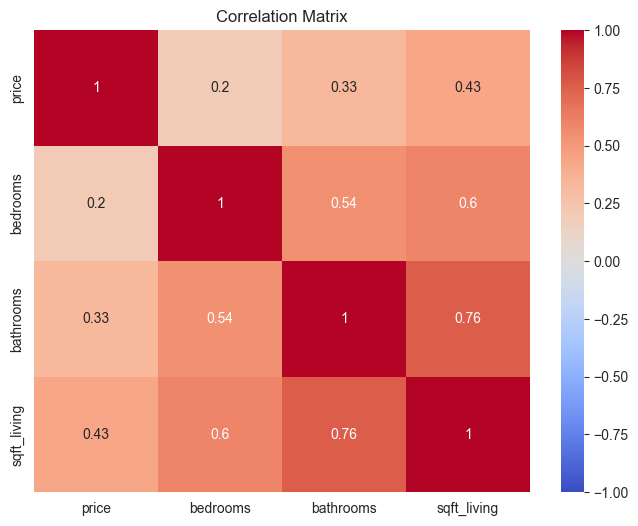

In [27]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Box Plot of Price by Waterfront')

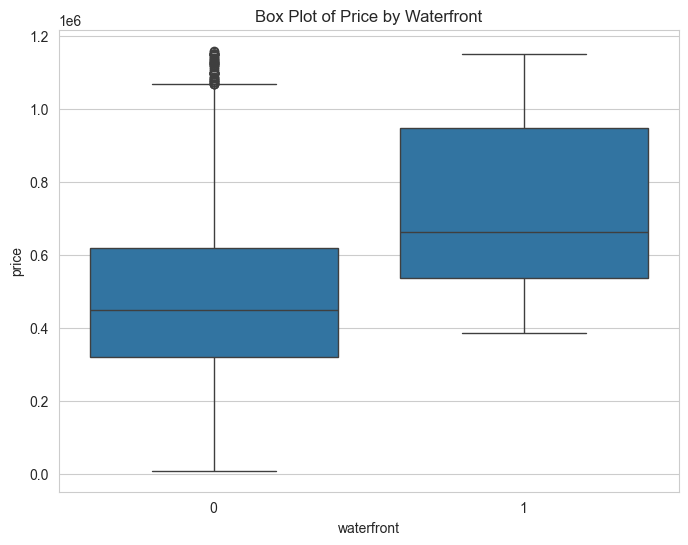

In [28]:
# Check price vs waterfront
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df_no_price_outliers)
plt.title('Box Plot of Price by Waterfront')

In [29]:
avg_waterfront_prices = df.query('waterfront == 1')['price'].mean()
avg_no_waterfront_prices = df.query('waterfront == 0')['price'].mean()
print(f'The average price of a houses in WA is: \n- Not a waterfront property: US${avg_no_waterfront_prices:.2f} \n- Waterfront property: US${avg_waterfront_prices:.2f}')
print(f'We can see a price increase of aproximatelly {(avg_waterfront_prices - avg_no_waterfront_prices) / avg_no_waterfront_prices * 100:.2f}%')

The average price of a houses in WA is: 
- Not a waterfront property: US$552271.53 
- Waterfront property: US$1589821.43
We can see a price increase of aproximatelly 187.87%


In [30]:
# Check price vs view
avg_view_prices = df.query('view == 1')['price'].mean()
avg_no_view_prices = df.query('view == 0')['price'].mean()
print(f'The average price of a houses in WA is: \n- Property without a view: US${avg_no_view_prices:.2f} \n- Property with a view: US${avg_view_prices:.2f}')
print(f'We can see a price increase of aproximatelly {(avg_view_prices - avg_no_view_prices) / avg_no_view_prices * 100:.2f}%')

The average price of a houses in WA is: 
- Property without a view: US$516542.80 
- Property with a view: US$899151.83
We can see a price increase of aproximatelly 74.07%


Text(0.5, 1.0, 'House Prices by Condition')

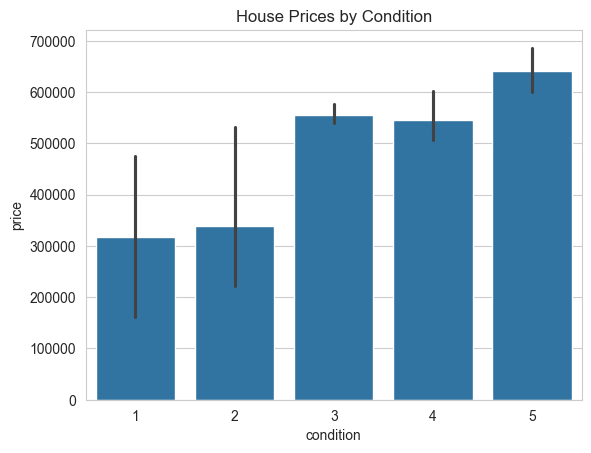

In [31]:
# Check price vs condition
sns.barplot(x='condition', y='price', data=df)
plt.title('House Prices by Condition')

In [32]:
avg_price_condition = df['price'].groupby(df['condition']).mean()
print(avg_price_condition)

condition
1   316960.00
2   339613.85
3   555749.15
4   545089.87
5   641754.48
Name: price, dtype: float64


In [34]:
# Price increase from each condition to the previous one
price = 316960.00
for p in avg_price_condition:
    percentage_condition = ((p- price)/ price * 100)
    price = p
    print(f'{percentage_condition:.2f}')

0.00
7.15
63.64
-1.92
17.73


In [35]:
# Price increase from each condition comparing to condition 1
price = 316960.00
for p in avg_price_condition:
    percentage_condition = ((p- price)/ price * 100)
    print(f'{percentage_condition:.2f}')

0.00
7.15
75.34
71.97
102.47


## Summary and Insights <a name="summary"></a>

After analysing the dataset we can finally answer the questions set in the beginning of our exploration.

### What is the distribution of the house prices?
- Around one third of the houses (34.4%) have prices in the 200-400k range
- Only 4.4% of the houses have prices below 200k
- Only 7.5% of the houses have prices higher than 1 million. And 7.2% of the houses have prices that ranges from 800k to 1 million.
- Meaning that **80.9%** of the houses have a **price between 200k and 800k**.

### How many houses have a price that is a lot higher or lower than the rest (outliers)?
- Considering an upper bound of US$1162500.00. The dataset has 215 positive outliers.
- Meaning that **there are 215 houses with a price that is a lot higher than the rest**, this makes 5.26% of the dataset.
n
### What are the top 5 cities with the highest house prices in MA? And the top five cities with the most houses?
The **top five cities with the highest house prices** are:   
- Medina          (2,046,559.09)
- Clyde Hill      (1,678,925.00)
- Yarrow Point    (1,194,837.50)
- Mercer Island   (1,169,036.56)
- Bellevue        (878,531.33)

And the **top five cities with the highest number of houses** are:
- Seattle     (1402)
- Renton       (259)
- Bellevue     (255)
- Redmond      (208)
- Kirkland     (166)

### How do property characteristics like bedrooms, bathrooms, and sqft_living correlate with price?
According to the correlation matrix we can see that:
- Bedrooms and Bathrooms have a weak positive correlation with price (0.2 and 0.33, respectively)
- And the house size (sqft_living) has a moderate positive correlation with the house prices (0.43)
From that we can conclude that **the most influent factor on the house prices is the square footage of the space** (when analysing bedrooms, bathrooms, and sqft living). 

### How does waterfront, view, and condition impacts the price?

1. Waterfront
   
   The average price of a houses in WA is: 
    - Not a waterfront property: US 552271.53
    - Waterfront property: US 1589821.43

    We can see a **price increase of aproximatelly 187.87%**

3. View
   
   The average price of a houses in WA is: 
    - Property without a view: US 516542.80 
    - Property with a view: US 899151.83
    
    We can see a **price increase of aproximatelly 74.07%**
   
5. Condition

   The average price per property condition is:
   
   (condition - price)
    - 1 - 316 960.00
    - 2 - 339 613.85
    - 3 - 555 749.15
    - 4 - 545 089.87
    - 5 - 641 754.48


   Here we can see that the biggest jump in price happens from **condition 2 to 3 with a 63.4% increase**.

   And overall the **difference in the average price from condition 1 to 5 is 102%**.